# Análise Exploratória de Dados

## Bibliotecas e Parâmetros Globais

In [1]:
import pandas as pd
import numpy as np

import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

import statsmodels.formula.api as smf
import scipy.stats as stats
import factor_analyzer

In [2]:
# Parâmetros globais de visualização
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.autolayout"] = False
plt.rcParams["font.size"] = 11
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

## Estatística Descritiva Geral

In [3]:
df=pd.read_csv(r"../dados/microdados_enem_2019/dados_enem_processados.csv")
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q008,Q009,Q018,Q020,Q021,Q022,Q023,Q025,MEDIA_CANDIDATO,SCORE_RIQUEZA
0,190001867757,2,1,1,1,1,2,0,3,1.0,...,1,2,1,1,0,2,1,1,722.58,7
1,190001692704,3,1,1,1,1,2,0,2,1.0,...,1,3,0,1,0,3,0,0,477.44,5
2,190001595660,2,1,1,2,1,2,0,2,1.0,...,1,2,0,0,0,3,0,1,498.76,2
3,190001421552,2,0,1,2,1,2,0,2,1.0,...,1,2,0,0,0,2,0,1,614.34,3
4,190001480443,3,0,2,3,4,2,0,2,1.0,...,1,2,0,1,0,4,0,1,422.28,6


In [4]:
df[['MEDIA_CANDIDATO', 'SCORE_RIQUEZA']].describe()

,MEDIA_CANDIDATO,SCORE_RIQUEZA
count,880332.000000,880332.000000
mean,529.750393,6.307442
std,80.889918,4.239932
min,96.000000,0.000000
25%,469.260000,3.000000
50%,520.740000,6.000000
75%,583.600000,8.000000
max,850.820000,50.000000


### Amostra e Significância Estatística

Vamos selecionar 3 mil candidatos aleatoriamente da nossa base de 800 mil para visualizações criar as visualizações.

In [5]:
sample=df.sample(n=3000, random_state=69)

Com base na amostra de 3 mil candidatos extraída da base de dados do Enem, calculamos os intervalos de confiança a 99% para duas variáveis principais:
- MEDIA_CANDIDATO
- SCORE_RIQUEZA

In [6]:

colunas = ['MEDIA_CANDIDATO', 'SCORE_RIQUEZA']
confianca = 0.99

for col in colunas:
    dados_col = sample[col].dropna()
    n = len(dados_col)
    media = np.mean(dados_col)
    intervalo = stats.t.interval(confianca, n-1, loc=media, scale=stats.sem(dados_col))
    margem_erro = intervalo[1] - media
    
    print(f"Variavel: {col}")
    print(f"Média: {media:.2f}")
    print(f"Margem de Erro (99%): ±{margem_erro:.2f}")
    print(f"Intervalo: {intervalo[0]:.2f} até {intervalo[1]:.2f}")
    st = sms.DescrStatsW(dados_col)
    print(f"CI (Statsmodels): {st.tconfint_mean(alpha=0.01)}\n")



Variavel: MEDIA_CANDIDATO
Média: 529.17
Margem de Erro (99%): ±3.77
Intervalo: 525.40 até 532.95
CI (Statsmodels): (np.float64(525.4006329311202), np.float64(532.9492470688798))

Variavel: SCORE_RIQUEZA
Média: 6.31
Margem de Erro (99%): ±0.20
Intervalo: 6.11 até 6.51
CI (Statsmodels): (np.float64(6.106803788839563), np.float64(6.509196211160437))



#### Desempenho dos Candidatos (MEDIA_CANDIDATO)

A média de desempenho dos candidatos foi de 529,17 pontos, com margem de erro de ±3,77 pontos ao nível de confiança de 99%. Isso significa que, com 99% de confiança, a verdadeira média populacional está compreendida entre 525,40 e 532,95 pontos. Este intervalo relativamente estreito nos indica uma boa precisão da estimativa, sugerindo que a amostra de 3 mil candidatos é representativa da população total para esta variável.


#### Índice de Riqueza (SCORE_RIQUEZA)

O índice de riqueza apresentou uma média de 6,31, com margem de erro de ±0,20 ao nível de confiança de 99%, resultando em um intervalo de confiança entre 6,11 e 6,51. A margem de erro proporcionalmente menor em relação à média (aproximadamente 3,2%) demonstra-nos uma estimativa bastante precisa para esta variável, refletindo menor variabilidade nos dados.

## Visualizações

### Desempenho Acadêmico vs Fatores Socioeconômicos

In [7]:
def plots(sample):
    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    (ax1, ax2), (ax3, ax4) = axes
   
    hist_color = sns.color_palette("Blues", 8)[4]
    riqueza_color = sns.color_palette("Greens", 8)[4]
    box_palette = sns.color_palette("Set2")
    box_palette_2 = sns.color_palette("Set2", 2)
    
    # Distribuição de Notas
    sns.histplot(
        data=sample,
        x="MEDIA_CANDIDATO",
        bins=30,
        kde=True,
        color=hist_color,
        ax=ax1
    )
    ax1.set_title("Distribuição de Notas (Média do Candidato)", fontsize=14, fontweight="bold")
    ax1.set_xlabel("Nota média do candidato")
    ax1.set_ylabel("Frequência")

    # Distribuição de Riqueza
    sns.histplot(
        data=sample,
        x="SCORE_RIQUEZA",
        bins=40,
        kde=True,
        color=riqueza_color,
        ax=ax2
    )
    ax2.set_title("Distribuição do Score de Riqueza", fontsize=14, fontweight="bold")
    ax2.set_xlabel("Score de riqueza")
    ax2.set_ylabel("Frequência")

    # Riqueza vs Nota
    sample_plot = sample.copy()
    sample_plot["SCORE_RIQUEZA_FAIXA"] = pd.qcut(
        sample_plot["SCORE_RIQUEZA"], 
        q=4, 
        labels=["Baixa\n(0-25%)", "Média-baixa\n(25-50%)", "Média-alta\n(50-75%)", "Alta\n(75-100%)"],
        duplicates='drop'
    )
    
    mapa_ensino = {
    1.0: "Ensino Regular",
    2.0: "Educ. Especial"
    }

    sample_plot["TP_ENSINO_LABEL"] = sample_plot["TP_ENSINO"].map(mapa_ensino)
    
    sns.boxplot(
        data=sample_plot,
        x="SCORE_RIQUEZA_FAIXA",
        y="MEDIA_CANDIDATO",
        hue="TP_ENSINO_LABEL",
        palette=box_palette_2,
        ax=ax3
    )
    ax3.set_title("Relação entre Riqueza e Nota, por Tipo de Ensino", fontsize=14, fontweight="bold")
    ax3.set_xlabel("Faixa de riqueza (quartis)")
    ax3.set_ylabel("Nota média do candidato")
    ax3.legend(title="Tipo de ensino", fontsize=9, title_fontsize=10, loc="best")
    ax3.tick_params(axis='x', rotation=0)

    # Tipo de Escola vs Nota
    tp_escola = sample[sample['TP_ESCOLA'].isin([2, 3])].copy()
    tp_escola['TP_ESCOLA'] = tp_escola['TP_ESCOLA'].map({2: 'Pública', 3: 'Privada'})
    
    sns.boxplot(
        data=tp_escola,
        x="TP_ESCOLA",
        y="MEDIA_CANDIDATO",
        hue="TP_ESCOLA", 
        palette=box_palette_2,
        legend=False,
        ax=ax4
    )
    ax4.set_title("Nota: Escola Pública vs Privada", fontsize=14, fontweight="bold")
    ax4.set_xlabel("Tipo de escola")
    ax4.set_ylabel("Nota média")

    fig.suptitle("Análise Exploratória ENEM", fontsize=18, fontweight="bold", y=0.98)

    for ax in axes.flatten():
        ax.tick_params(axis='x', rotation=20)
        sns.despine(ax=ax)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



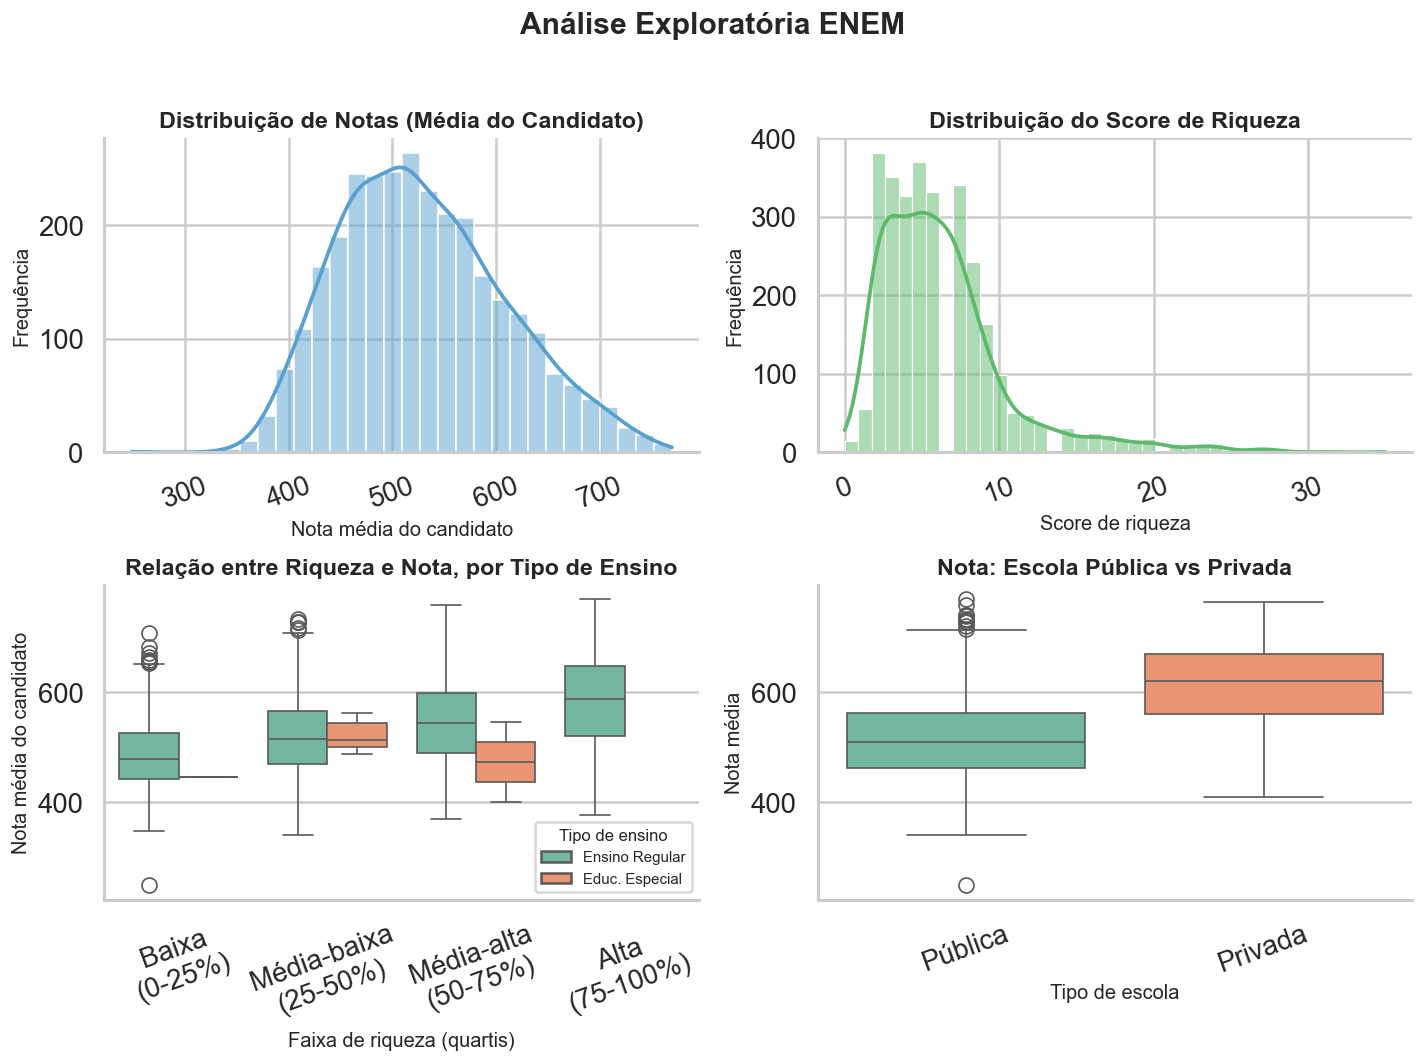

In [8]:
if __name__ == "__main__":
    plots(sample)

A análise visual dos dados revelou padrões significativos sobre a distribuição das notas e a influência do perfil socioeconômico e do tipo de ensino no desempenho dos candidatos.

#### Análise dos Histogramas

- **Distribuição de Notas:** A média do candidato apresenta uma distribuição aproximadamente normal, com um leve deslocamento à direita (assimetria positiva). O pico de frequência concentra-se em torno dos 500 a 550 pontos, o que corrobora a média amostral calculada anteriormente (529,17).
- **Distribuição do Score de Riqueza:** Diferente das notas, o score de riqueza possui uma assimetria positiva acentuada. A grande maioria dos candidatos concentra-se na faixa de 0 a 10 pontos, com uma "cauda" longa que se estende até valores próximos a 30, indicando que candidatos com alto poder aquisitivo são uma minoria na base de dados.

#### Análise do Boxplot Inferior Esquerdo 

Relação entre a faixa de riqueza com a nota média, segmentando pelo tipo de ensino:

- **Tendência de Crescimento:** Observa-se uma correlação positiva clara: à medida que a faixa de riqueza aumenta (de "Baixa" para "Alta"), a mediana das notas também sobe.
- **Disparidade por Tipo de Ensino:** É notável que, dentro de uma mesma faixa de riqueza (especialmente nas faixas "Média-baixa" e "Média-alta"), o Tipo de Ensino Ensino Regular  apresenta uma variabilidade e medianas distintas do tipo Educação Especial. Na faixa de riqueza "Alta", o desempenho atinge patamares mais elevados.

**Observação**: a coluna SCORE_RIQUEZA originial não é divida em faixa de riqueza, na realidade, é uma variável discreta contínua que varia de 0 a 35. Decidimos dividir em faixa de riqueza para que fique visualmente agradável no boxplot, pois os valores estavam se sobrepondo.

#### Análise do Boxplot Inferior Direito 

Sintetiza a disparidade educacional no Brasil

- **Escola Pública:** Apresenta uma mediana de notas significativamente inferior, situada abaixo dos 600 pontos, com uma dispersão considerável e presença de outliers inferiores.
- **Escola Privada:** Demonstra uma performance superior, com a base do seu boxplot (primeiro quartil) posicionada quase no mesmo nível da mediana das escolas públicas. A mediana das escolas privadas aproxima-se dos 650 pontos, evidenciando uma vantagem competitiva clara em termos de pontuação bruta.

Os dados sugerem que o desempenho no Enem não é um fator isolado, mas fortemente condicionado por indicadores socioeconômicos e pelo acesso a diferentes tipos de instituição de ensino. A análise estatística de significância realizada anteriormente ganha contexto aqui: embora a média geral seja de 529,17, essa média esconde profundas desigualdades quando estratificamos a população por nível de riqueza, rede escolar e tipo de ensino.

### Correlação Fatores Diversos e Notas

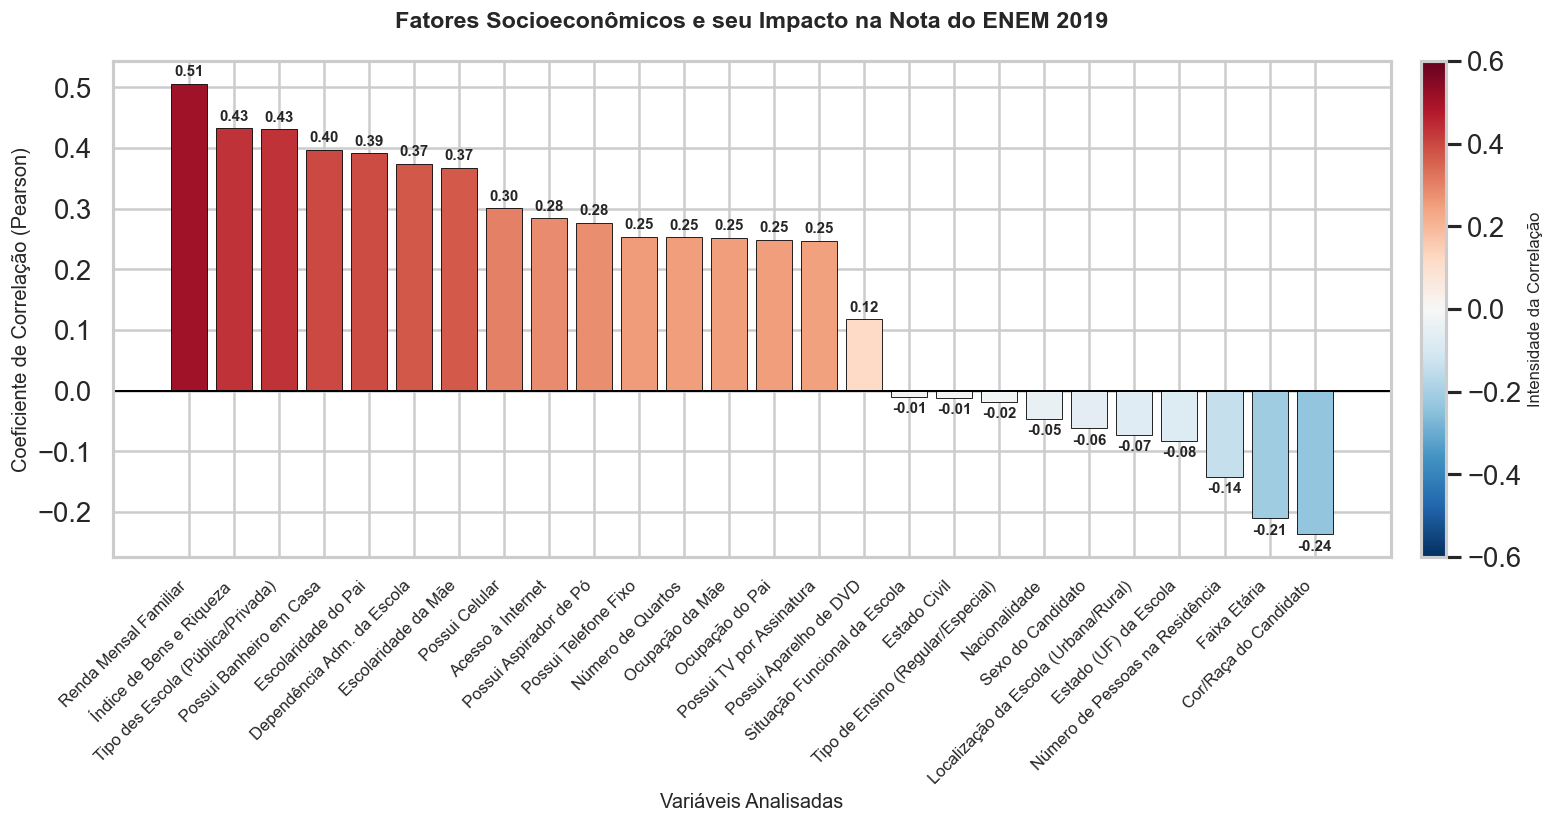

In [11]:
map_labels = {
    'Q006': 'Renda Mensal Familiar',
    'SCORE_RIQUEZA': 'Índice de Bens e Riqueza',
    'TP_ESCOLA': 'Tipo des Escola (Pública/Privada)',
    'Q008': 'Possui Banheiro em Casa',
    'Q001': 'Escolaridade do Pai',
    'TP_DEPENDENCIA_ADM_ESC': 'Dependência Adm. da Escola',
    'Q002': 'Escolaridade da Mãe',
    'Q022': 'Possui Celular',
    'Q025': 'Acesso à Internet',
    'Q018': 'Possui Aspirador de Pó',
    'Q023': 'Possui Telefone Fixo',
    'Q009': 'Número de Quartos',
    'Q004': 'Ocupação da Mãe',
    'Q003': 'Ocupação do Pai',
    'Q021': 'Possui TV por Assinatura',
    'Q020': 'Possui Aparelho de DVD',
    'TP_SIT_FUNC_ESC': 'Situação Funcional da Escola',
    'TP_ESTADO_CIVIL': 'Estado Civil',
    'TP_ENSINO': 'Tipo de Ensino (Regular/Especial)',
    'TP_NACIONALIDADE': 'Nacionalidade',
    'TP_SEXO': 'Sexo do Candidato',
    'TP_LOCALIZACAO_ESC': 'Localização da Escola (Urbana/Rural)',
    'SG_UF_ESC': 'Estado (UF) da Escola',
    'Q005': 'Número de Pessoas na Residência',
    'TP_FAIXA_ETARIA': 'Faixa Etária',
    'TP_COR_RACA': 'Cor/Raça do Candidato'
}

correlacoes_nota = sample.corr()['MEDIA_CANDIDATO'].sort_values(ascending=False)

correlacoes_nota = correlacoes_nota.drop(
    ['MEDIA_CANDIDATO', 'NU_INSCRICAO', 'NU_NOTA_REDACAO', 
     'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
     'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU'], 
    errors='ignore'
).dropna()

fig, ax = plt.subplots(figsize=(14, 7))

codigos = correlacoes_nota.index
valores = correlacoes_nota.values

labels_cat = [map_labels.get(c, c) for c in codigos]

import matplotlib as mpl
cmap = mpl.colormaps.get_cmap("RdBu_r")
norm = plt.Normalize(vmin=-0.6, vmax=0.6)
colors = cmap(norm(valores))

bars = ax.bar(labels_cat, valores, color=colors, edgecolor='black', linewidth=0.5)

ax.axhline(0, color='black', linewidth=1.2)

ax.set_title("Fatores Socioeconômicos e seu Impacto na Nota do ENEM 2019", pad=20, fontweight='bold')
ax.set_ylabel("Coeficiente de Correlação (Pearson)", fontsize=12)
ax.set_xlabel("Variáveis Analisadas", fontsize=12)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)

for bar, val in zip(bars, valores):
    va = 'bottom' if val > 0 else 'top'
    offset = 3 if val > 0 else -3
    ax.annotate(f"{val:.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, val),
                xytext=(0, offset),
                textcoords="offset points",
                ha='center', va=va, fontsize=9, fontweight='bold')

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Intensidade da Correlação", fontsize=10)

plt.tight_layout()
plt.show()

De modo geral, percebemos um padrão consistente: variáveis ligadas a renda, patrimônio e capital cultural tendem a ter correlação positiva com a nota, enquanto algumas variáveis demográficas/territoriais aparecem com correlação fraca (próxima de zero) ou negativa. As variáveis de maior corelação positiva (de 0.37 até 0.51) apontam que o desempenho no ENEM está relacionado a um conjunto de condições socioeconômicas e educacionais (renda, bens, infraestrutura domiciliar e escolaridade dos pais). O conjunto de váriáveis de correlação positiva moderada (0.12 a 0.30) reforça a interpretação de que recursos domésticos e acesso a tecnologia se associam positivamente ao desempenho, embora com força menor do que renda/bens/variáveis educacionais. Por fim, o bloco de variáveis de correlações negativas sugere que certos perfis demográficos e contextos podem estar associados a menores médias, refletindo desigualdades estruturais no nosso país.

### Curva de Lorenz

Decidimos analisar a Curva de Lorenz e do Índice de Gini, pois ambos nos permitem quantificar quão concentrados estão os recursos (riqueza) e os resultados (notas) entre os candidatos da amostra.

In [12]:
def gini(array):
    """Calcula o coeficiente de Gini de um array numérico."""


    if len(array) == 0:
        return 0

    array = array.astype(float)
    array += np.abs(np.min(array)) if np.min(array) < 0 else 0

    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [13]:
def plot_lorenz_curve(dframe, coluna):
    
    v = dframe[coluna].dropna().sort_values().values
    lorenz = np.cumsum(v) / v.sum()
    lorenz = np.insert(lorenz, 0, 0)
    x_axis = np.linspace(0, 1, len(lorenz))
    
    gini_value = gini(dframe[coluna])
    
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(x_axis, lorenz, linewidth=2.5, color='#2E86AB', 
            label='Curva de Lorenz', zorder=3)
    ax.fill_between(x_axis, lorenz, alpha=0.3, color='#2E86AB', zorder=2)
    
    ax.plot([0, 1], [0, 1], linewidth=2, color='#A23B72', 
            linestyle='--', label='Igualdade Perfeita', zorder=3)
    
    ax.fill_between(x_axis, lorenz, x_axis, alpha=0.15, 
                    color='#E63946', label='Área de Desigualdade', zorder=1)
    
    ax.text(0.98, 0.05, f'Índice de Gini: {gini_value:.4f}', 
            transform=ax.transAxes, fontsize=13, fontweight='bold',
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', 
                     edgecolor='gray', alpha=0.9, pad=0.8))
    
    titulo = f"Curva de Lorenz - Desigualdade em {coluna.replace('_', ' ').title()}"
    ax.set_title(titulo, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("Porcentagem Acumulada da População", 
                  fontsize=13, fontweight='semibold')
    ax.set_ylabel("Porcentagem Acumulada do Valor", 
                  fontsize=13, fontweight='semibold')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    
    from matplotlib.ticker import PercentFormatter
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    
    ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
    ax.set_axisbelow(True)
    
    ax.legend(loc='upper left', fontsize=11, framealpha=0.95, 
             edgecolor='gray', fancybox=True)
    
    for spine in ax.spines.values():
        spine.set_edgecolor('#333333')
        spine.set_linewidth(1.2)
    
    plt.tight_layout()
    plt.show()

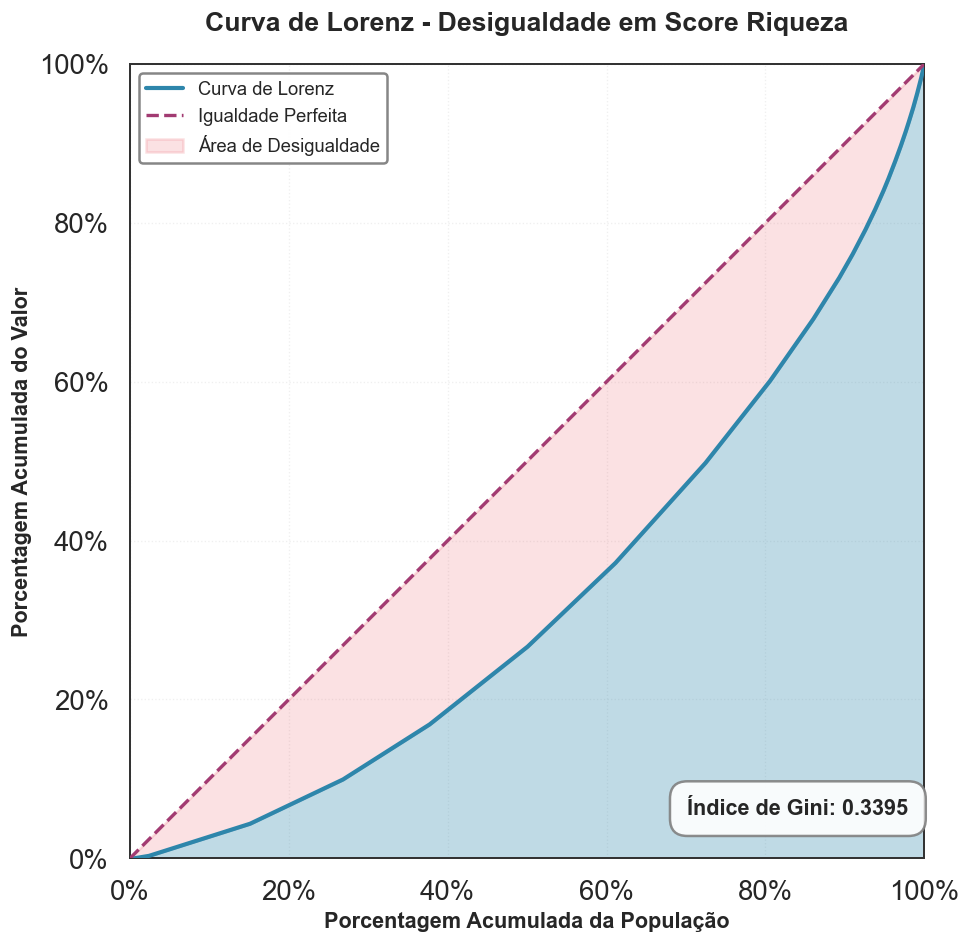

In [14]:
plot_lorenz_curve(sample, 'SCORE_RIQUEZA')

#### Análise da Distribuição do Capital Econômico entre os Candidatos

Um índice de Gini de 0,3395 indica uma desigualdade moderada. Na prática, significa que o "estoque" de riqueza não está distribuído de forma igualitária; uma parcela menor da população detém uma fatia desproporcional dos bens e renda medidos pelo score. Observa-se que os 40% "mais pobres" da amostra detêm menos de 20% do valor acumulado de riqueza, enquanto a curva se inclina bruscamente ao final, representando a elite socioeconômica dos candidatos.

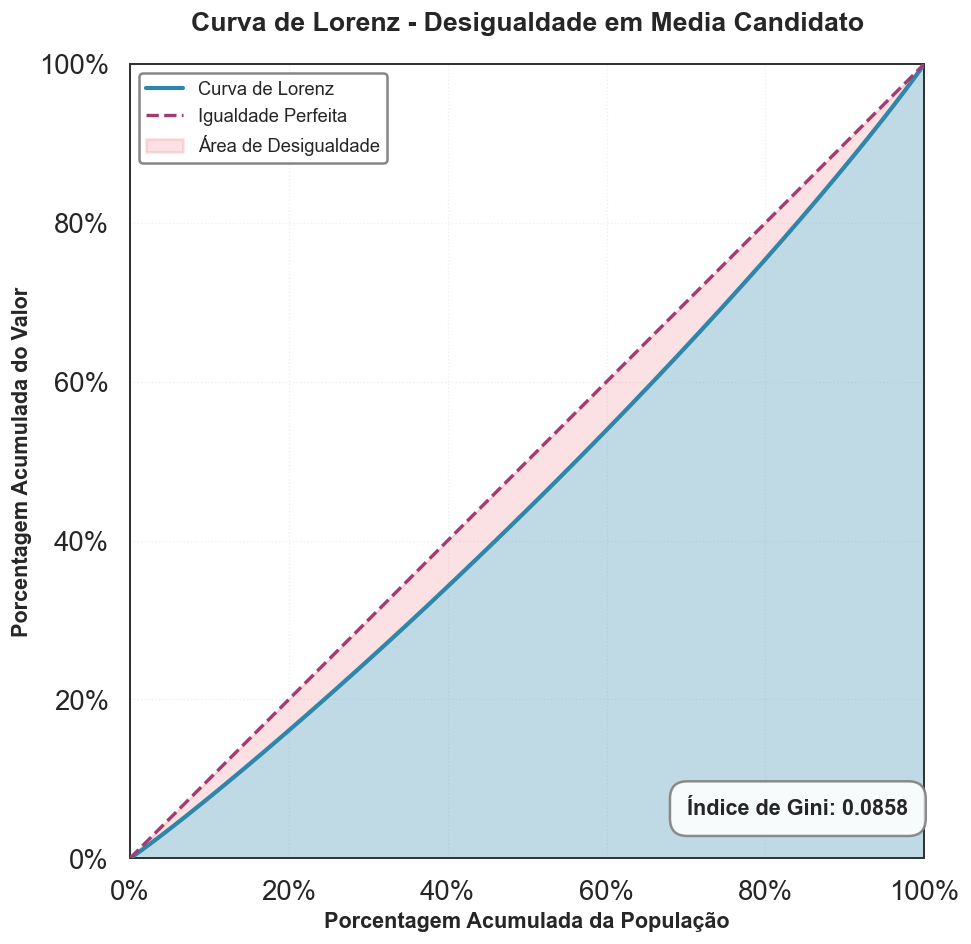

In [15]:
plot_lorenz_curve(sample, 'MEDIA_CANDIDATO')

#### Análise da Distribuição das Notas

Um índice de Gini de 0,0858 é considerado muito baixo, indicando que as notas estão distribuídas de forma muito mais "democrática" ou uniforme do que a riqueza. A curva de Lorenz está muito próxima da linha de igualdade perfeita. Isso ocorre porque as notas do Enem possuem limites naturais (0 a 1000) e a maioria dos candidatos tende a se concentrar em torno da média (como visto no histograma da análise exploratória). Diferente da riqueza, que pode ser acumulada quase infinitamente, a nota tem um "teto", o que achata a desigualdade estatística.